<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Genap 2024/2025

Fakultas Ilmu Komputer, Universitas Indonesia

##**Lab 8: *Clustering***

###**Tenggat Waktu: 25 Mei 2025, 23.55 WIB**
</center>

### **Ketentuan:**

1. Dokumen template lab dengan format .ipynb dan dataset (jika dibutuhkan) telah disediakan di SCeLe
2. Jalankan kode pada dokumen .ipynb dan perhatikan dengan saksama apa yang potongan kode tersebut lakukan beserta dengan keluarannya. Jawablah **pertanyaan** yang disisipkan pada potongan program yang diberikan.
3. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dikumpulkan dengan format penamaan **Kelas_LabX_NPM_Nama.ipynb** . Contoh: A_Lab1_1806205773_Abdurrafi Arief.ipynb. Kesalahan dalam pengumpulan nama akan dikenakan pinalti sebesar 5 poin.
4. Kumpulkan dokumen tersebut pada submisi yang telah disediakan di SCeLe sesuai dengan kelas masing-masing sebelum **Tenggat Waktu: 25 Mei 2025, 23.55 WIB**.
5. Keterlambatan pengumpulan akan dikenakan pinalti sebesar 5 poin per jam (pembulatan ke atas). Dengan cut off 1 hari.
6. Lab ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin maupun mengambil jawaban orang lain) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.
7. Pakta Integritas **Wajib** di isi dan di jalankan. Submisi hanya akan dinilai jika pakta integritas di isi dan di jalankan.
8. Sebelum di kumpulkan, kode **WAJIB** dijalankan. Jika tidak, dikenakan penalti sebesar 50%.
9. Mahasiswa wajib mencantumkan semua sumber yang menjadi referensi jawaban, termasuk GPT.
10. Kesalahan submisi merupakan tanggung jawab mahasiswa dan akan dikenakan penalti sesuai dengan ketentuan yang berlaku. Asisten dosen tidak menerima submisi di luar Scele.


In [91]:
# Isi dengan data diri Anda
NAMA = "Scudetto Ciano Syam"
KELAS = "C"
NPM = "2206083294"
USERNAME_KAGGLE = "scudetto"

# Isi dengan NPM teman yang berdiskusi dengan Anda
KOLABORATOR = []

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan
REFERENSI = ['Tutorial lab kasdad 8, chat gpt, ppt kasdad, lab tahun lalu https://drive.google.com/drive/folders/19SnfT6yl-X33y05ZnnUPSckdzA6wfOgp?usp=sharing']

In [2]:
PERNYATAAN_INTEGRITAS = "Saya, %s dari kelas %s dengan NPM %s, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.\n\
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.\n \
\n\
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.\n   \
(%s)" % (NAMA, KELAS, NPM, NAMA)

print(PERNYATAAN_INTEGRITAS)

Saya, Scudetto Ciano Syam dari kelas C dengan NPM 2206083294, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.
 
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.
   (Scudetto Ciano Syam)


# Import Library

In [3]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib.cm as cm
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

from sklearn.decomposition import PCA
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from IPython.display import display

# Clustering

## Definisi

Clustering atau pengelompokan adalah salah satu teknik dalam *unsupervised learning* yang bertujuan untuk mengelompokkan data ke dalam beberapa grup (cluster) berdasarkan kemiripan atau pola tertentu. Artinya, data yang berada dalam satu cluster diharapkan memiliki karakteristik yang serupa, sedangkan data yang berada di cluster berbeda memiliki karakteristik yang berbeda pula.

Berbeda dengan *supervised learning* yang menggunakan label (target) sebagai panduan, clustering tidak memiliki label yang bisa dijadikan acuan. Jadi, kita tidak tahu sejak awal mana data yang "bagus" atau "buruk" misalnya. Justru tugas kita adalah **mencari tahu sendiri apakah ada pola atau pengelompokan yang tersembunyi** di dalam data.

Meskipun begitu, hasil clustering tidak memberikan makna eksplisit pada tiap cluster, kita perlu **menginterpretasikannya sendiri**. Ini bisa dibantu dengan visualisasi atau melihat komposisi masing-masing cluster terhadap fitur-fitur tertentu.

## Clustering buat apa?

"Kenapa tidak langsung pakai *supervised learning* saja yang jelas targetnya?". Tidak semua data memiliki label, dan membuat label seringkali mahal, sulit, atau bahkan tidak mungkin. Beberapa alasan kenapa clustering itu berguna:

1. **Eksplorasi Pola**  
   Clustering bisa membantu menemukan pola tersembunyi yang mungkin tidak kita sadari sebelumnya. Misalnya, dalam data pelanggan, bisa jadi ada kelompok dengan perilaku mirip yang bisa dijadikan target kampanye marketing tertentu.

2. **Menghemat Waktu dan Biaya**  
   Karena tidak perlu label, clustering cocok untuk kondisi di mana membuat label itu mahal atau sulit, seperti analisis artefak kuno, genomik, atau data historis.

3. **Segmentasi Data**  
   Berguna dalam membagi data ke dalam kelompok tertentu, seperti segmentasi pelanggan, tipe siswa, atau jenis wilayah.

4. **Deteksi Anomali**  
   Clustering bisa digunakan untuk mendeteksi data yang "nyeleneh" atau outlier, misalnya dalam sistem keamanan atau pendeteksian penipuan.

5. **Preprocessing**  
   Bisa dipakai sebagai langkah awal untuk menyederhanakan data sebelum digunakan di model yang lebih kompleks.

## Algoritma Clustering

Ada banyak algoritma clustering, tetapi untuk lab kali ini kita akan fokus pada dua yang paling umum:

### 1. K-Means Clustering
K-Means bekerja dengan cara mengelompokkan data ke dalam *K* cluster berdasarkan jarak ke pusat cluster (*centroid*). Algoritma ini akan menyesuaikan posisi centroid dan mengelompokkan ulang data hingga posisi centroid stabil. Kelebihannya cepat dan cocok untuk data yang bentuknya cukup "bulat" dan seimbang.

### 2. Hierarchical (Agglomerative) Clustering
Metode ini membentuk struktur seperti pohon (disebut *dendrogram*), dimulai dengan setiap data sebagai cluster tunggal lalu secara bertahap digabungkan berdasarkan kemiripan hingga semua data berada dalam satu cluster besar. Metode ini tidak perlu menentukan jumlah cluster di awal dan cocok untuk melihat struktur data yang lebih kompleks.

Selanjutnya kita akan mencoba clustering menggunakan kedua algoritma tersebut

# Preprocessing Data

In [4]:
df = pd.read_csv("CC GENERAL.csv")
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

| Atribut              | Penjelasan                                |
|--------------------- |-------------------------------------------|
| CUST_ID                    | ID pelanggan (Kategorikal)                 |
| BALANCE              | Saldo rekening pelanggan                |
| BALANCE_FREQUENCY  | Seberapa sering saldonya ter-update (1 = sering, 0 tidak) |
| PURCHASES                | Jumlah total pembelian        |
| ONEOFF_PURCHASES                | Jumlah pembelian maksimum        |
| INSTALLMENTS_PURCHASES                | Jumlah pembelian untuk kredit       |
| CASH_ADVANCE   | Uang tunai yang diberikan oleh pengguna        |
| PURCHASES_FREQUENCY  | Seberapa sering Pembelian dilakukan, skor antara 0 dan 1 (1 = sering dibeli, 0 = jarang dibeli)   |
| ONEOFFPURCHASESFREQUENCY  | Seberapa sering Pembelian dilakukan dalam satu kali transaksi (1 = sering dibeli, 0 = jarang dibeli)   |
| PURCHASESINSTALLMENTSFREQUENCY   | Seberapa sering pembelian dalam angsuran dilakukan (1 = sering dilakukan, 0 = jarang dilakukan) |
| CASHADVANCEFREQUENCY   | Seberapa sering uang tunai di muka dibayar   |
| CASHADVANCETRX   | Jumlah Transaksi yang dilakukan dengan CASH_ADVANCE   |
| PURCHASES_TRX     | Jumlah transaksi pembelian yang dilakukan              |
| CREDIT_LIMIT     | Batas Kartu Kredit untuk pengguna              |
| PAYMENTS   | Jumlah Pembayaran yang dilakukan oleh pengguna    |
| MINIMUM_PAYMENTS   | Jumlah pembayaran minimum yang dilakukan oleh pengguna  |
| PRCFULLPAYMENT   | Persentase pembayaran penuh yang dibayarkan oleh pengguna   |
| TENURE   | Masa pelayanan kartu kredit bagi pengguna |
> Data diambil dari [https://www.kaggle.com/datasets/arjunbhasin2013/ccdata](https://www.kaggle.com/datasets/arjunbhasin2013/ccdata)

In [6]:
# Drop ID column
df = df.drop(['CUST_ID'], axis=1)

In [7]:
# Impute missing values
null_columns = df.columns[df.isnull().any()].tolist()

imputer = KNNImputer()
df_imp = pd.DataFrame(imputer.fit_transform(df[null_columns]), columns=null_columns)
df = df.fillna(df_imp)

In [8]:
# Scaling
df_scaled = pd.DataFrame(StandardScaler().fit_transform(df), columns=df.columns)
df_scaled.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960383,-0.528979,-0.310170,-0.525551,0.36068
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688676,0.818642,0.088799,0.234227,0.36068
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826098,-0.383805,-0.101550,-0.525551,0.36068
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826098,-0.598688,0.000553,-0.525551,0.36068
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905414,-0.364368,-0.265142,-0.525551,0.36068


In [9]:
# df tanpa PCA
df_selected = df_scaled[['BALANCE', 'CREDIT_LIMIT', 'PURCHASES']]

In [10]:
# df dengan PCA
df_pca = df_scaled.copy()
pca = PCA(n_components=12, random_state=42)
df_pca = pd.DataFrame(pca.fit_transform(df_pca))

In [11]:
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)

print(f"Cumulative explained variance: {cumulative_explained_variance}")

Cumulative explained variance: [0.27290378 0.47593543 0.56385685 0.63874958 0.70129245 0.75873438
 0.8076232  0.85023444 0.88846579 0.91926523 0.94298414 0.96073776]


Nantinya ada 2 cara yang akan dibahas untuk memvisualisasi dan menginterpretasi hasil clustering, yaitu ketika menggunakan fitur yang dipilih secara manual dan ketika menggunakan PCA

# Clustering dengan K-Means

(Untuk contoh clustering dengan KMeans kita akan coba menggunakan `df_selected`)

Setelah kita menyiapkan data, langkah selanjutnya adalah menentukan **berapa banyak cluster (K)** yang paling masuk akal sebagai input algoritma KMeans. Di sini kita tidak punya label sebagai pembanding, jadi kita perlu menggunakan metrik evaluasi internal. Salah satu yang paling umum dipakai adalah **Silhouette Coefficient**.

**Silhouette Coefficient (SC)** adalah metrik yang mengukur **konsistensi** hasil clustering: seberapa dekat tiap data dengan anggota clusternya sendiri dibandingkan dengan cluster lainnya. Jadi, SC memberi kita gambaran apakah data sudah benar-benar cocok berada di dalam cluster tersebut atau justru lebih cocok pindah ke cluster lain.

Nilainya berada di antara -1 dan 1:

- Nilai mendekati **1** → data sangat mirip dengan clusternya sendiri dan sangat berbeda dengan cluster lain (ideal).
- Nilai mendekati **0** → data berada di perbatasan dua cluster.
- Nilai mendekati **-1** → data mungkin lebih cocok masuk ke cluster lain (tidak ideal).


In [12]:
# Menghitung silhouette coefficient untuk beberapa nilai k
print("Compare nilai silhouete coefficient")
print("=================================================")
for k in range(2,7):
    clusterer = KMeans(n_clusters=k, n_init=10, random_state=42)
    cluster_labels = clusterer.fit_predict(df_selected)
    silhouette_avg = silhouette_score(df_selected, cluster_labels, random_state=42)
    print(f"Untuk k = {k}, rata-rata silhouette_coefficient adalah: {silhouette_avg:.4f}")

Compare nilai silhouete coefficient
Untuk k = 2, rata-rata silhouette_coefficient adalah: 0.5495
Untuk k = 3, rata-rata silhouette_coefficient adalah: 0.5332
Untuk k = 4, rata-rata silhouette_coefficient adalah: 0.4553
Untuk k = 5, rata-rata silhouette_coefficient adalah: 0.4474
Untuk k = 6, rata-rata silhouette_coefficient adalah: 0.4615


Untuk membantu analisis, kita bisa memvisualisasikan hasil perhitungan Silhouette Coefficient menggunakan SilhouetteVisualizer.

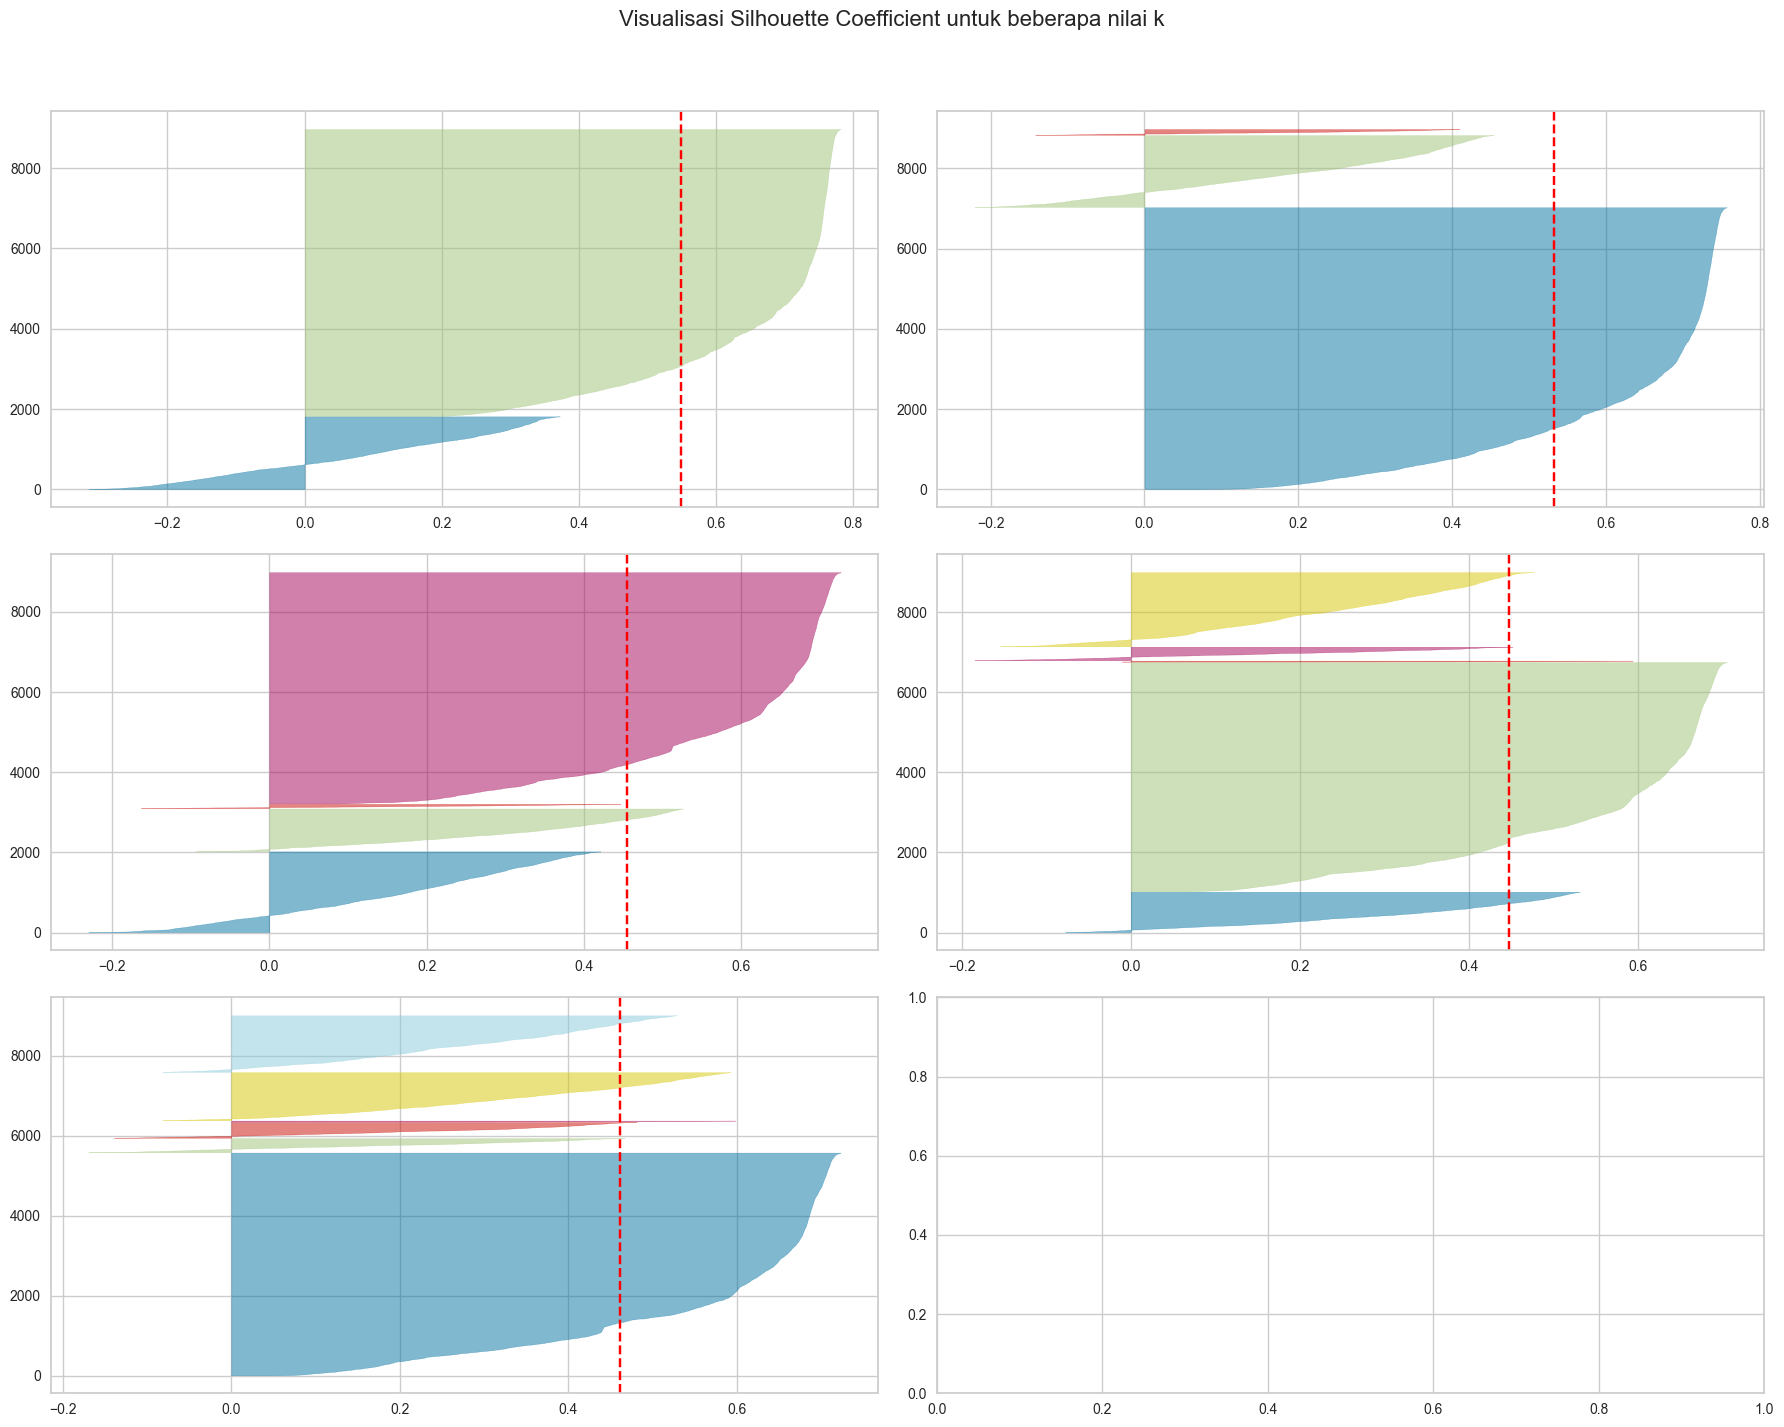

In [13]:
# Visualisasi silhouette coefficient
fig, ax = plt.subplots(3, 2, figsize=(18, 15))
fig.suptitle("Visualisasi Silhouette Coefficient untuk beberapa nilai k", fontsize=16)
k_values = range(2, 7)
for idx, k in enumerate(k_values):
    clusterer = KMeans(n_clusters=k, n_init=10, random_state=42)
    row, col = divmod(idx, 2)
    visualizer = SilhouetteVisualizer(clusterer, colors='yellowbrick', ax=ax[row][col])
    visualizer.fit(df_selected)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Cara menganalisa SilhouetteVisualizer:
- Setiap warna mewakili cluster yang berbeda
- Lebar plot cluster (Y-axis) adalah jumlah sampel dalam cluster
- Cluster terdefinisi dengan baik kalau plot clusternya mendekati SC 1 (atau sebagian besar plotnya melewati garis merah putus2)
- Seluruh cluster terdefinisi dengan baik jika cluster-cluster yang berbeda memiliki bentuk plot yang relatif sama (konsisten dan tidak ada fluktuasi signifikan) dan terdapat sedikit atau tidak ada sampel dengan SC negatif

Selain menggunakan **Silhouette Coefficient**, kita juga bisa menentukan jumlah cluster yang optimal dengan cara lain, yaitu **Elbow Method**. Untuk elbow method, kita hanya perlu melihat di titik mana penurunan inertia sudah tidak signifikan lagi, atau di mana terjadi perubahan drastis pada gradien kurva.

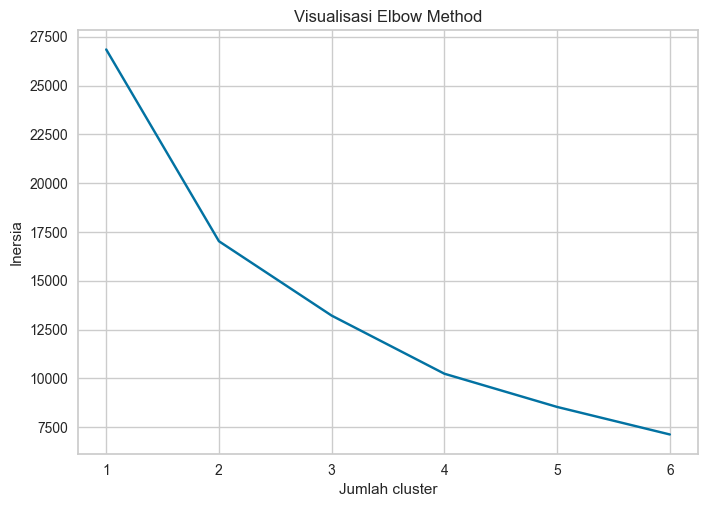

In [14]:
inertia = []
cluster_range = range(1, 7)

for cluster in cluster_range:
    km = KMeans(n_clusters=cluster, n_init=10, random_state=42)
    km = km.fit(df_selected)
    inertia.append(km.inertia_)

plt.plot(cluster_range, inertia, 'bx-')
plt.xlabel('Jumlah cluster')
plt.ylabel('Inersia')
plt.title('Visualisasi Elbow Method')

plt.show()

Terlihat bahwa di titik jummlah cluster=2, tekukannya paling tajam, sehingga k=2 adalah jumlah cluster yang lumayan optimal.

Bisa dilihat dari SC dan visualisasi yang dilakukan diatas, k=2 dan 3 menjadi kandidat jumlah cluster yang bagus, tetapi untuk tutorial ini, kita akan memakai k=2 saja

Sekarang kita coba train model dengan jumlah cluster yang optimal (k=2)

In [15]:
kmeans = KMeans(n_clusters=2, n_init=10, random_state=42)
cluster_assignment = kmeans.fit_predict(df_selected)

In [16]:
# Buat dataframe baru dengan hasil cluster
df_with_clusters = pd.DataFrame(df_selected.copy())
df_with_clusters['cluster'] = cluster_assignment
df_with_clusters.head()

,BALANCE,CREDIT_LIMIT,PURCHASES,cluster
0,-0.731989,-0.960383,-0.424900,1
1,0.786961,0.688676,-0.469552,0
2,0.447135,0.826098,-0.107668,0
3,0.049099,0.826098,0.232058,1
4,-0.358775,-0.905414,-0.462063,1


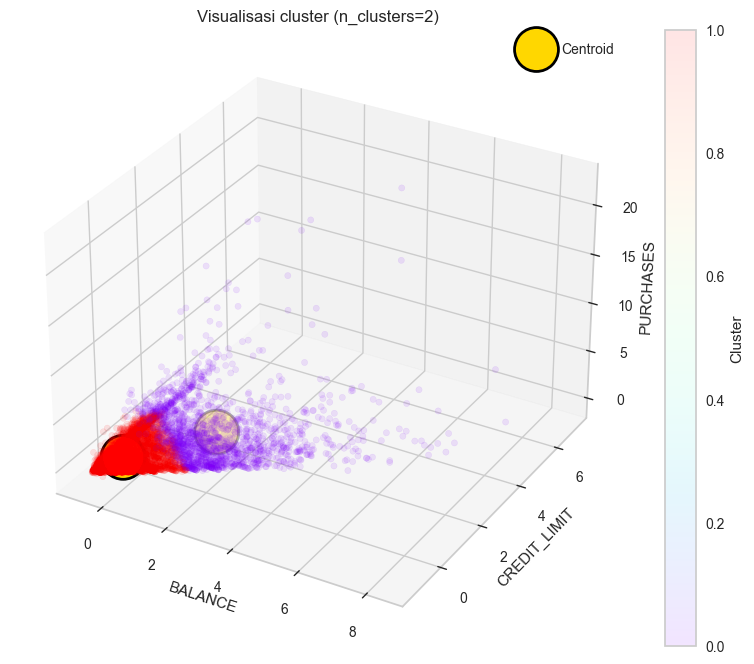

In [17]:
# Visualisasi 3D
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection="3d")

# Untuk ngubah viewing anglenya
# ax.view_init(elev=0, azim=0)

# Untuk kasus ini memakai 3 variabel untuk visualisasi
x = df_with_clusters["BALANCE"]
y = df_with_clusters['CREDIT_LIMIT']
z = df_with_clusters['PURCHASES']
cluster = df_with_clusters['cluster']

# Visualisasi hasil clustering
sc = ax.scatter(x, y, z, c=cluster, cmap="rainbow", alpha=0.1)

# Tambah centroid
centroids = kmeans.cluster_centers_
ax.scatter(
    centroids[:, 0], centroids[:, 1], centroids[:, 2],
    c='gold', s=1000, marker='o', edgecolor='black', linewidth=2, label='Centroid'
)

plt.title("Visualisasi cluster (n_clusters=2)")
ax.set_xlabel(df_with_clusters.columns[0])
ax.set_ylabel(df_with_clusters.columns[1])
ax.set_zlabel(df_with_clusters.columns[2])
plt.colorbar(sc, label='Cluster')
plt.legend()
plt.show()

kita coba ubah viewing anglenya

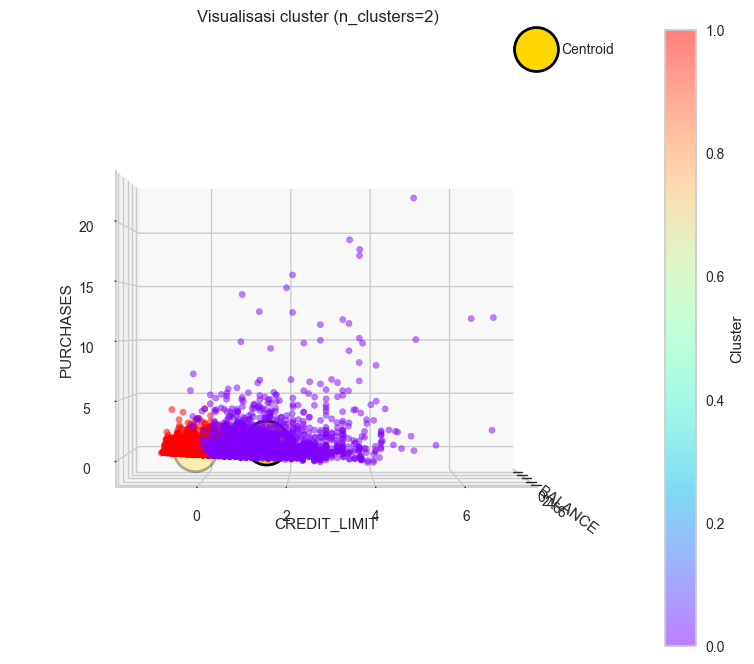

In [18]:
# Visualisasi 3D
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection="3d")

# Untuk ngubah viewing anglenya
ax.view_init(elev=0, azim=0)

# Untuk kasus ini memakai 3 variabel untuk visualisasi
x = df_with_clusters["BALANCE"]
y = df_with_clusters['CREDIT_LIMIT']
z = df_with_clusters['PURCHASES']
cluster = df_with_clusters['cluster']

# Visualisasi hasil clustering
sc = ax.scatter(x, y, z, c=cluster, cmap="rainbow", alpha=0.5)

# Tambah centroid
centroids = kmeans.cluster_centers_
ax.scatter(
    centroids[:, 0], centroids[:, 1], centroids[:, 2],
    c='gold', s=1000, marker='o', edgecolor='black', linewidth=2, label='Centroid'
)

plt.title("Visualisasi cluster (n_clusters=2)")
ax.set_xlabel(df_with_clusters.columns[0])
ax.set_ylabel(df_with_clusters.columns[1])
ax.set_zlabel(df_with_clusters.columns[2])
plt.colorbar(sc, label='Cluster')
plt.legend()
plt.show()

In [19]:
# Posisi Centroid
kmeans.cluster_centers_

array([[ 1.35618254,  1.43850517,  0.64918762],
       [-0.34379417, -0.36466307, -0.16456997]])

Contoh interpretasi singkat:
Cluster merah cenderung mempunyai credit limit dan balance yang rendah. Walaupun jumlah duit yang dikeluarkan oleh cluster merah cenderung sama dengan cluster ungu, namun sebagian customer dari cluster ungu ada yang mengeluarkan lebih banyak duit. Oleh karena itu, cluster ungu berpotensi untuk ditargetkan sebagai segmen premium (mempunyai nilai tinggi)

# Hierarchical Clustering

(Untuk Hierarchical CLustering, kita coba menggunakan `df_pca`)

Dengan Hierarchical Clustering, kita bisa menentukan jumlah cluster yang optimal tanpa harus menentukan jumlahnya di awal seperti pada KMeans. Caranya adalah dengan mencari garis vertikal terpanjang yang tidak terpotong oleh garis horizontal. Garis horizontal yang kita tarik untuk "memotong" dendrogram akan menentukan jumlah cluster, tergantung di level mana kita ingin membaginya

![image.png](https://statsandr.com/blog/clustering-analysis-k-means-and-hierarchical-clustering-by-hand-and-in-r_files/optimal%20number%20of%20clusters%20hierarchical%20clustering.png)
<sub>Sumber: (https://statsandr.com/blog/files/Hierarchical-clustering-cheatsheet.pdf)</sub>

Sekarang kita coba buat modelnya

In [20]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
cluster_assignment = model.fit(df_pca)

In [21]:
# Fungsi untuk plot dendrogram
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)
    shc.dendrogram(linkage_matrix, **kwargs)
    return linkage_matrix

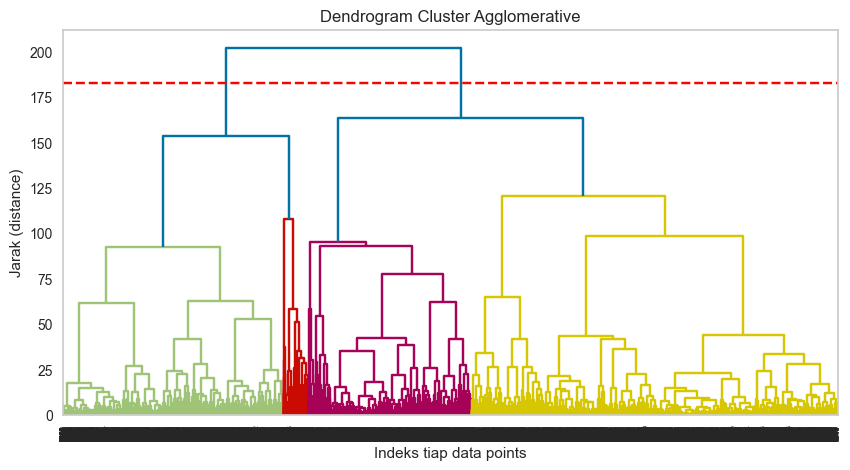

In [22]:
plt.figure(figsize=(10, 5))
plt.grid(False)
linkage_matrix = plot_dendrogram(model, truncate_mode=None)
plt.title("Dendrogram Cluster Agglomerative")
plt.xlabel("Indeks tiap data points")
plt.ylabel("Jarak (distance)")

# Untuk mencari optimal cut
distances = linkage_matrix[:, 2]
gaps = np.diff(distances)
max_gap_idx = np.argmax(gaps)
optimal_cut = (distances[max_gap_idx] + distances[max_gap_idx + 1]) / 2

plt.axhline(y=optimal_cut, color='red', linestyle='dashed')
plt.show()

Bisa dilihat bahwa garis putus-putus horizontal merah memotong 4 garis vertikal, sehingga jumlah cluster yang baik adalah 4.

Selanjutnya kita coba bikin model dengan n_clusters=4

In [23]:
# Pilih n_clusters berdasarkan dendrogram
agglomerative = AgglomerativeClustering(n_clusters=4)
cluster_assignment = agglomerative.fit_predict(df_pca)

In [24]:
# Append hasil cluster ke df original
df_with_clusters = pd.DataFrame(df.copy())
df_with_clusters['cluster'] = cluster_assignment + 1
df_with_clusters['cluster'] = 'Cluster ' + df_with_clusters['cluster'].astype(str)
df_with_clusters.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,Cluster 1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,Cluster 3
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,Cluster 4
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,866.010744,0.000000,12,Cluster 1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,Cluster 1


In [25]:
# Group berdasarkan cluster dan hitung statistik deskriptif
df_cluster_stats = df_with_clusters.groupby('cluster').describe().T.reset_index()
df_cluster_stats = df_cluster_stats.rename(columns={'level_0': 'Feature', 'level_1': 'Metric'})

In [26]:
# Hanya ambil mean (Kalian juga bisa pakai median)
df_centroids = df_cluster_stats[df_cluster_stats['Metric'] == 'mean'].set_index('Feature')

In [27]:
# Display
df_centroids.columns.name = "Feature"
df_centroids.index.name = None
df_centroids.style.background_gradient(cmap='Greys')

Feature,Metric,Cluster 1,Cluster 2,Cluster 3,Cluster 4
BALANCE,mean,863.745122,3596.534386,3691.350391,924.195856
BALANCE_FREQUENCY,mean,0.774455,0.980619,0.972201,0.965483
PURCHASES,mean,378.896208,8813.091181,550.158599,1488.753131
ONEOFF_PURCHASES,mean,247.714623,6024.582500,318.431809,751.913742
INSTALLMENTS_PURCHASES,mean,131.589488,2790.592014,231.792398,736.933632
CASH_ADVANCE,mean,559.066968,455.186537,3141.735341,135.910324
PURCHASES_FREQUENCY,mean,0.293200,0.929603,0.299165,0.907670
ONEOFF_PURCHASES_FREQUENCY,mean,0.104910,0.751747,0.126111,0.358060
PURCHASES_INSTALLMENTS_FREQUENCY,mean,0.187981,0.706303,0.220119,0.723961
CASH_ADVANCE_FREQUENCY,mean,0.092791,0.043634,0.387679,0.029133


Contoh interpretasi:<br>

Cluster 1: Pengguna Pasif

Memiliki balance yang rendah dengan aktivitas transaksi yang sangat minim. Credit limitnya juga cenderung rendah. Nasabah mungkin jarang menggunakan kartu kredit mereka sehingga berpotensi menjadi nasabah tidak aktif

Cluster 2: Power shopper

Pengeluaran dan jumlah transaksi pembeliannya tinggi. Memiliki credit limit yang besar dan pembayaran (PAYMENTS) yang tinggi juga. Merepresentasikan nasabah yang sering berbelanja dengan nilai tinggi

Cluster 3: Pengambil pinjaman

Cash advance nya tinggi dengan frekuensi cash advance yang juga tinggi. Minimum paymentsnya cenderung besar, sementara persentase full payment mereka terendah (PRC_FULL_PAYMENT). Mungkin nasabah dalam cluster ini mengandalkan kartu kredit terutama untuk kebutuhan pinjaman tunai.

Cluster 4: Nasabah Teratur

Pola pembelian dan jumlah transaksi nya moderat. Persentase full payment tertinggi dibanding cluster lainnya. Bisa jadi mencerminkan nasabah yang disiplin dalam menggunakan kartu kreditnya

# Latihan

## Deskripsi Dataset

In [28]:
df = pd.read_csv("Pokemon.csv")
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


| Kolom         | Deskripsi                                                                 |
|---------------|---------------------------------------------------------------------------|
| #             | Nomor urut Pokémon dalam Pokédex.                                        |
| Name          | Nama dari Pokémon.                                                       |
| Type 1        | Tipe utama dari Pokémon (misal: Water, Fire, Grass, dll).                |
| Type 2        | Tipe sekunder dari Pokémon (jika ada). Bisa bernilai null.               |
| Total         | Total nilai statistik (penjumlahan dari HP, Attack, Defense, dll).       |
| HP            | Hit Points (darah/nyawa) dari Pokémon.                                   |
| Attack        | Nilai serangan fisik Pokémon.                                            |
| Defense       | Nilai pertahanan fisik Pokémon.                                          |
| Sp. Atk       | Nilai serangan spesial (seperti jurus elemen).                           |
| Sp. Def       | Nilai pertahanan terhadap serangan spesial.                              |
| Speed         | Kecepatan Pokémon.                        |
| Generation    | Generasi Pokémon (dari 1 hingga 6).                                      |
| Legendary     | Apakah Pokémon termasuk kategori Legendary (`True`) atau bukan (`False`).|


## Preprocessing dataset

In [30]:
# cek sebaran data dan info lainnya 

# Buat ringkasan untuk setiap kolom
summary = []

for col in df.columns:
    summary.append({
        'Column': col,
        'Data Type': df[col].dtype,
        'Non-Null Count': df[col].notna().sum(),
        'Null Count': df[col].isna().sum(),
        'Unique Count': df[col].nunique(),
        'Example Unique Values': df[col].unique()[:5]  # hanya tampilkan max 5 contoh
    })

# Ubah ke DataFrame
summary_df = pd.DataFrame(summary)

# Set kolom 'Column' sebagai index untuk tampilan lebih rapi
summary_df.set_index('Column', inplace=True)

# Tampilkan ringkasan
summary_df


,Data Type,Non-Null Count,Null Count,Unique Count,Example Unique Values
Column,,,,,
#,int64,800,0,721,"[1, 2, 3, 4, 5]"
Name,object,800,0,800,"[Bulbasaur, Ivysaur, Venusaur, VenusaurMega Ve..."
Type 1,object,800,0,18,"[Grass, Fire, Water, Bug, Normal]"
Type 2,object,414,386,18,"[Poison, nan, Flying, Dragon, Ground]"
Total,int64,800,0,200,"[318, 405, 525, 625, 309]"
HP,int64,800,0,94,"[45, 60, 80, 39, 58]"
Attack,int64,800,0,111,"[49, 62, 82, 100, 52]"
Defense,int64,800,0,103,"[49, 63, 83, 123, 43]"
Sp. Atk,int64,800,0,105,"[65, 80, 100, 122, 60]"


## Handle missing value

In [31]:
import pandas as pd

# Calculate missing values count and percentage
missing_values = pd.DataFrame({
    'Missing Values': df.isna().sum(),
    'Percentage': (df.isna().sum() / len(df) * 100).round(2)
})

# Sort by missing values count in descending order
missing_values = missing_values.sort_values('Missing Values', ascending=False)

# Display the results
print("\nMissing Values Analysis:")
print("=" * 50)
print(missing_values)

# Display total missing values
total_missing = df.isna().sum().sum()
total_percentage = (total_missing / (df.shape[0] * df.shape[1]) * 100).round(2)
print("\nTotal Missing Values:", total_missing)
print("Total Percentage:", total_percentage, "%")


Missing Values Analysis:
            Missing Values  Percentage
Type 2                 386       48.25
#                        0        0.00
Name                     0        0.00
Type 1                   0        0.00
Total                    0        0.00
HP                       0        0.00
Attack                   0        0.00
Defense                  0        0.00
Sp. Atk                  0        0.00
Sp. Def                  0        0.00
Speed                    0        0.00
Generation               0        0.00
Legendary                0        0.00

Total Missing Values: 386
Total Percentage: 3.71 %


Type 2 merupakan tipe sekunder, dimana tidak semua pokemon memilikinya. Handling sulit dilakukan karena bersifat kategorikal dan dari domain memang seharusnya dikosongkan. Oleh karena itu untuk penanganan saya akan menghilangkan kolum type 2 untuk menghindari kehilangan data . Saya juga akan menghilangkan # (id), dan nama karena kurang relevan. Saya juga memastikan tidak menggunakan 2 fitur tersebut sebagai fitur clustering saya

In [32]:

df = df.drop(['Type 2', '#', 'Name'], axis=1)

In [33]:
import pandas as pd

# Calculate missing values count and percentage
missing_values = pd.DataFrame({
    'Missing Values': df.isna().sum(),
    'Percentage': (df.isna().sum() / len(df) * 100).round(2)
})

# Sort by missing values count in descending order
missing_values = missing_values.sort_values('Missing Values', ascending=False)

# Display the results
print("\nMissing Values Analysis:")
print("=" * 50)
print(missing_values)

# Display total missing values
total_missing = df.isna().sum().sum()
total_percentage = (total_missing / (df.shape[0] * df.shape[1]) * 100).round(2)
print("\nTotal Missing Values:", total_missing)
print("Total Percentage:", total_percentage, "%")


Missing Values Analysis:
            Missing Values  Percentage
Type 1                   0         0.0
Total                    0         0.0
HP                       0         0.0
Attack                   0         0.0
Defense                  0         0.0
Sp. Atk                  0         0.0
Sp. Def                  0         0.0
Speed                    0         0.0
Generation               0         0.0
Legendary                0         0.0

Total Missing Values: 0
Total Percentage: 0.0 %


## handle outliers 

In [34]:
 # melihat outlier untuk data numerik, referensi : lab 3 kasdad latihan
# Inisiasi dictionary untuk hasil 
outlier_counts = {}

# Mencari nilai Q1, Q3, IQR, lower bound, upper bound, dan jumlah outlier
for col in df.select_dtypes(include=['number']).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR 

    outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    
    outlier_counts[col] = outliers

# Buat dataframe untuk hasil
outliers_df = pd.DataFrame(list(outlier_counts.items()), columns=['Kolom', 'Jumlah Outlier'])
print(outliers_df)

        Kolom  Jumlah Outlier
0       Total               0
1          HP              19
2      Attack               7
3     Defense              13
4     Sp. Atk              10
5     Sp. Def               7
6       Speed               2
7  Generation               0


Akan dilakukan penanganan clipping karena k-means sangat sensitif terhadap outliers

In [35]:
columns_to_clip = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]

for col in columns_to_clip:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower_bound, upper_bound)

In [36]:
 # melihat outlier untuk data numerik, referensi : lab 3 kasdad latihan
# Inisiasi dictionary untuk hasil 
outlier_counts = {}

# Mencari nilai Q1, Q3, IQR, lower bound, upper bound, dan jumlah outlier
for col in df.select_dtypes(include=['number']).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR 

    outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    
    outlier_counts[col] = outliers

# Buat dataframe untuk hasil
outliers_df = pd.DataFrame(list(outlier_counts.items()), columns=['Kolom', 'Jumlah Outlier'])
print(outliers_df)

        Kolom  Jumlah Outlier
0       Total               0
1          HP               0
2      Attack               0
3     Defense               0
4     Sp. Atk               0
5     Sp. Def               0
6       Speed               0
7  Generation               0


## encoding fitur kategorikal

In [37]:

from sklearn.preprocessing import LabelEncoder
le_type1 = LabelEncoder()
df['Type 1'] = le_type1.fit_transform(df['Type 1'])

# Legendary sudah boolean, convert ke int
df['Legendary'] = df['Legendary'].astype(int)


## Standarisasi data

K-means sensitif terhadap skala data. Oleh karena itu perlu dilakukan standarisasi data

In [38]:
# referensi : tutorial kasdad lab 8
# Scaling
df_scaled = pd.DataFrame(StandardScaler().fit_transform(df), columns=df.columns)
df_scaled.head()

,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,-0.083828,-0.976765,-1.040993,-0.930560,-0.836334,-0.237871,-0.247914,-0.803394,-1.399637,-0.297381
1,-0.083828,-0.251088,-0.376883,-0.525944,-0.352554,0.227345,0.307118,-0.284992,-1.399637,-0.297381
2,-0.083828,0.749845,0.508598,0.096544,0.338559,0.847632,1.047161,0.406211,-1.399637,-0.297381
3,-0.083828,1.583957,0.508598,0.656783,1.720787,1.529949,1.787204,0.406211,-1.399637,-0.297381
4,-0.621765,-1.051836,-1.306637,-0.837187,-1.043668,-0.392942,-0.802947,-0.112191,-1.399637,-0.297381


## Pemilihan Fitur

Kalian harus:
- Memilih minimal 2 fitur yang akan dipakai untuk keperluan clustering, dan/atau
- Melakukan PCA pada dataset untuk clustering, dan/atau
- Menggunakan pendekatan lain

Wajib memberi alasan mengapa memakai fitur dan/atau pendekatan tertentu.

saya memilih fitur berikut : Attack, Speed, speed

hal ini karena ini merupakan Stats dasar Pokemon , yang mungkin bisa memberikan karakteristik  dan performa pokemo

In [39]:
# referensi : tutorial kasdad lab 8
df_selected = df_scaled[[ 'Attack', 'Defense', 'Speed']]

In [40]:
df_selected.head()

,Attack,Defense,Speed
0,-0.930560,-0.836334,-0.803394
1,-0.525944,-0.352554,-0.284992
2,0.096544,0.338559,0.406211
3,0.656783,1.720787,0.406211
4,-0.837187,-1.043668,-0.112191


## KMeans Clustering

### Soal 1

Hitunglah Silhouette Coefficient score untuk fitur yang sudah kalian pilih. k yang digunakan setidaknya 2 (k $\geq$ 2)

In [41]:
# referensi : tutorial kasdad lab 8
# Menghitung silhouette coefficient untuk beberapa nilai k
print("Compare nilai silhouete coefficient")
print("=================================================")
for k in range(2,15):
    clusterer = KMeans(n_clusters=k, n_init=10, random_state=42)
    cluster_labels = clusterer.fit_predict(df_selected)
    silhouette_avg = silhouette_score(df_selected, cluster_labels, random_state=42)
    print(f"Untuk k = {k}, rata-rata silhouette_coefficient adalah: {silhouette_avg:.4f}")

Compare nilai silhouete coefficient
Untuk k = 2, rata-rata silhouette_coefficient adalah: 0.3301
Untuk k = 3, rata-rata silhouette_coefficient adalah: 0.3272
Untuk k = 4, rata-rata silhouette_coefficient adalah: 0.2937
Untuk k = 5, rata-rata silhouette_coefficient adalah: 0.2711
Untuk k = 6, rata-rata silhouette_coefficient adalah: 0.2568
Untuk k = 7, rata-rata silhouette_coefficient adalah: 0.2580
Untuk k = 8, rata-rata silhouette_coefficient adalah: 0.2655
Untuk k = 9, rata-rata silhouette_coefficient adalah: 0.2544
Untuk k = 10, rata-rata silhouette_coefficient adalah: 0.2540
Untuk k = 11, rata-rata silhouette_coefficient adalah: 0.2441
Untuk k = 12, rata-rata silhouette_coefficient adalah: 0.2462
Untuk k = 13, rata-rata silhouette_coefficient adalah: 0.2459
Untuk k = 14, rata-rata silhouette_coefficient adalah: 0.2427


dari silhoutte coefficient diatas, k=2 merupakan nilai k yang optimal, selanjutnya akan melihat visualisasi dan penerapan metode penentu k lain

### Soal 2

Visualisasikan Silhouette Coefficient yang didapat sebelumnya menggunakan SilhouetteVisualizer. Berikan interpretasinya

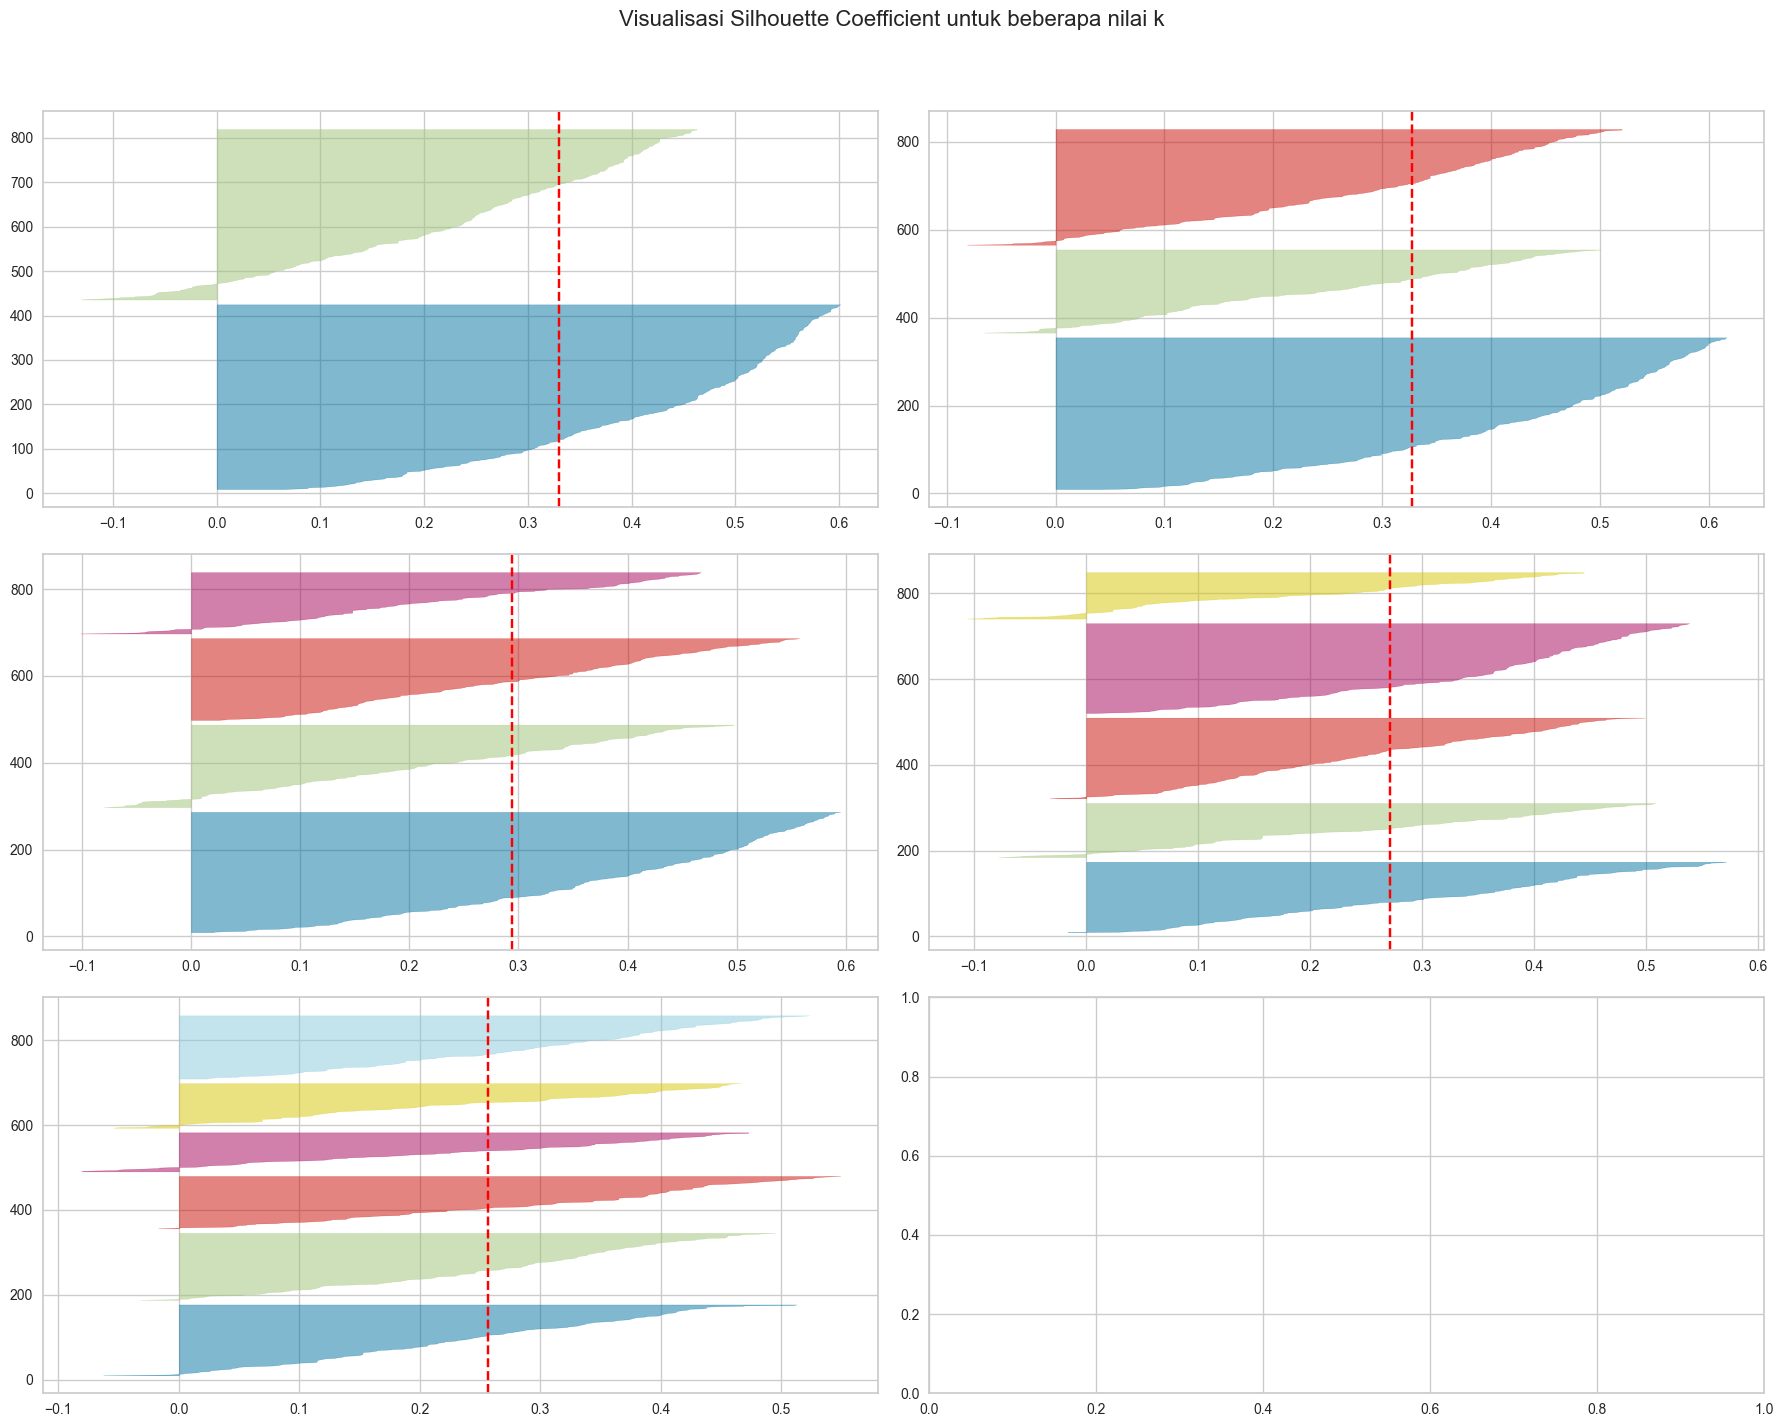

In [42]:
# referensi : tutorial kasdad lab 8
# Visualisasi silhouette coefficient
fig, ax = plt.subplots(3, 2, figsize=(18, 15))
fig.suptitle("Visualisasi Silhouette Coefficient untuk beberapa nilai k", fontsize=16)
k_values = range(2, 7)
for idx, k in enumerate(k_values):
    clusterer = KMeans(n_clusters=k, n_init=10, random_state=42)
    row, col = divmod(idx, 2)
    visualizer = SilhouetteVisualizer(clusterer, colors='yellowbrick', ax=ax[row][col])
    visualizer.fit(df_selected)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Visualisasi menunjukkan untuk setiap nilai k diatas, banyak plot hasil melewati garis merah. Dengan k=2 paling ideal karena kedua cluster memiliki distribusi yang relatif sama dengan hanya sedikit sampel negatif. Kedua cluster juga sudah melewati garis merah. 

### Soal 3

Tampilkan juga visualisasi elbow method (range k nya boleh beda). Berikan interpretasinya

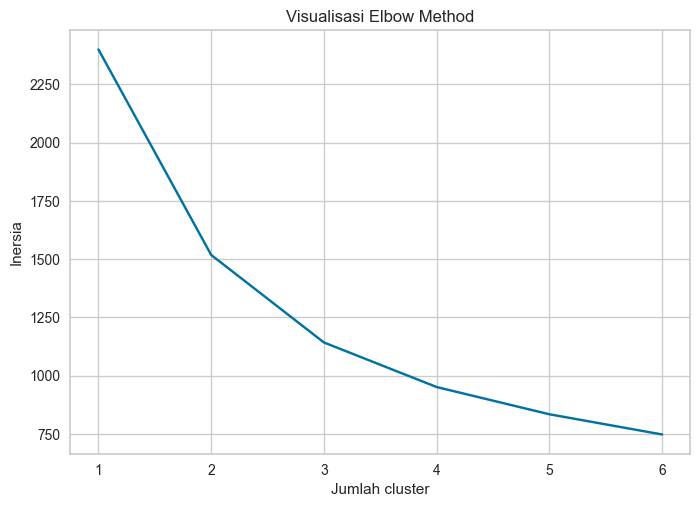

In [43]:
# referensi : tutorial kasdad lab 8
inertia = []
cluster_range = range(1, 7)

for cluster in cluster_range:
    km = KMeans(n_clusters=cluster, n_init=10, random_state=42)
    km = km.fit(df_selected)
    inertia.append(km.inertia_)

plt.plot(cluster_range, inertia, 'bx-')
plt.xlabel('Jumlah cluster')
plt.ylabel('Inersia')
plt.title('Visualisasi Elbow Method')

plt.show()

Dari visualisasi terlihat vidualisasi jumlah cluster terhadap inersia. Menggunakan prinsip elbow method dapat kita ambil jumlah kluster 2 karena ia merupakan lekukan paling tajam. Sehingga lebih optimal dibanding yang lain

### Soal 4

Berdasarkan jawaban kalian pada soal 1-3, tentukan jumlah cluster (nilai k) yang optimal. Jelaskan alasannya

Saya memilih k=2 karena dari hasil silhoutte cofficient maupun elbow method secara konsisten menunjukkan k=2 yang paling optimal. Selain k=2, k=3 juga dapat menjadi kandidat k yang baik. Namun pada kasus kali ini saya memilih k=2

In [44]:
optimal_k = 2

### Soal 5

Latih model KMeans dengan nilai k yang kalian tentukan pada Soal 4.

In [45]:
# referensi : tutorial kasdad lab 8
kmeans = KMeans(n_clusters=optimal_k, n_init=10, random_state=42)
cluster_assignment = kmeans.fit_predict(df_selected)

In [46]:
# Buat dataframe baru dengan hasil cluster
df_with_clusters = pd.DataFrame(df_selected.copy())
df_with_clusters['cluster'] = cluster_assignment
df_with_clusters.head()

,Attack,Defense,Speed,cluster
0,-0.930560,-0.836334,-0.803394,0
1,-0.525944,-0.352554,-0.284992,0
2,0.096544,0.338559,0.406211,1
3,0.656783,1.720787,0.406211,1
4,-0.837187,-1.043668,-0.112191,0


### Soal 6

Visualisasikan hasil clustering KMeans-nya dan berikan interpretasi dari visualisasi yang kalian dapat

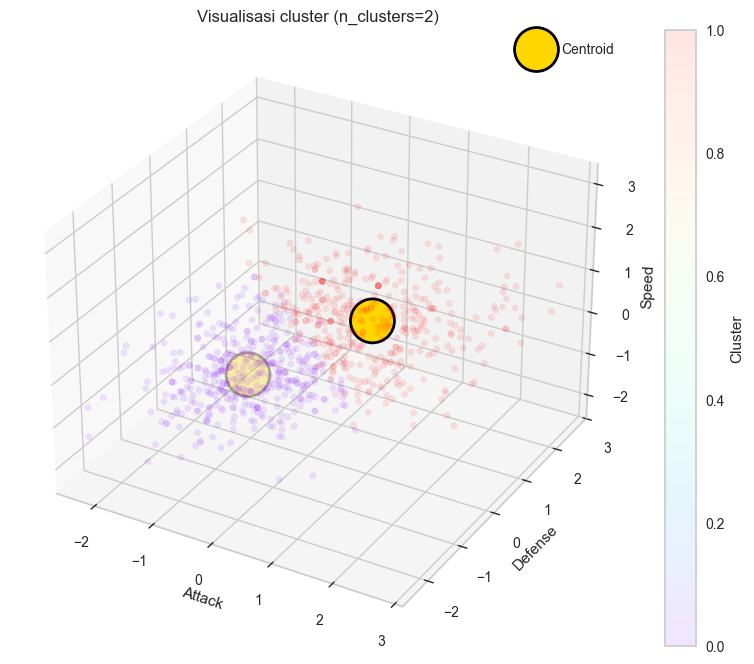

In [47]:
# referensi : tutorial kasdad lab 8
# Visualisasi 3D
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection="3d")

# Untuk kasus ini memakai 3 variabel untuk visualisasi
x = df_with_clusters["Attack"]
y = df_with_clusters["Defense"]
z = df_with_clusters["Speed"]
cluster = df_with_clusters['cluster']

# Visualisasi hasil clustering
sc = ax.scatter(x, y, z, c=cluster, cmap="rainbow", alpha=0.1)

# Tambah centroid
centroids = kmeans.cluster_centers_
ax.scatter(
    centroids[:, 0], centroids[:, 1], centroids[:, 2],
    c='gold', s=1000, marker='o', edgecolor='black', linewidth=2, label='Centroid'
)

plt.title("Visualisasi cluster (n_clusters=2)")
ax.set_xlabel(df_with_clusters.columns[0])
ax.set_ylabel(df_with_clusters.columns[1])
ax.set_zlabel(df_with_clusters.columns[2])
plt.colorbar(sc, label='Cluster')
plt.legend()
plt.show()

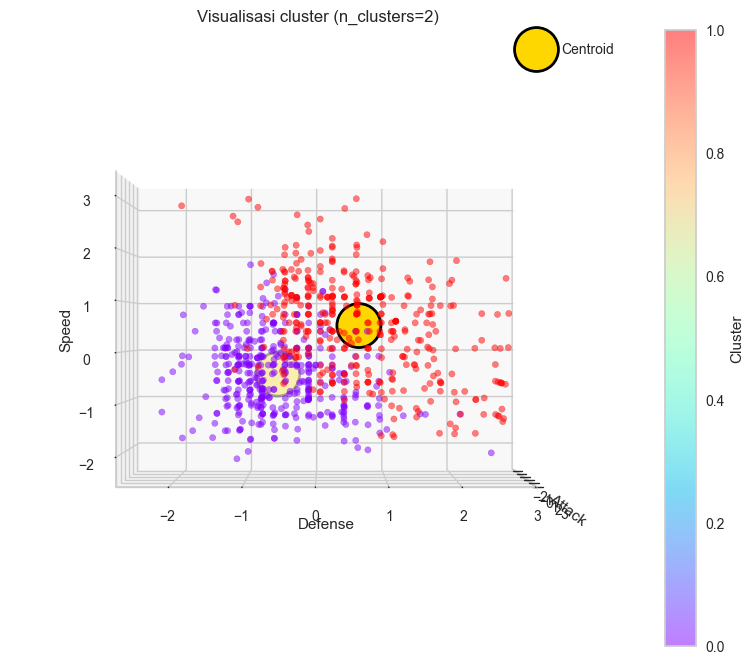

In [48]:
# Visualisasi 3D
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection="3d")

# Untuk ngubah viewing anglenya
ax.view_init(elev=0, azim=0)

# Untuk kasus ini memakai 3 variabel untuk visualisasi
x = df_with_clusters["Attack"]
y = df_with_clusters["Defense"]
z = df_with_clusters["Speed"]
cluster = df_with_clusters['cluster']

# Visualisasi hasil clustering
sc = ax.scatter(x, y, z, c=cluster, cmap="rainbow", alpha=0.5)

# Tambah centroid
centroids = kmeans.cluster_centers_
ax.scatter(
    centroids[:, 0], centroids[:, 1], centroids[:, 2],
    c='gold', s=1000, marker='o', edgecolor='black', linewidth=2, label='Centroid'
)

plt.title("Visualisasi cluster (n_clusters=2)")
ax.set_xlabel(df_with_clusters.columns[0])
ax.set_ylabel(df_with_clusters.columns[1])
ax.set_zlabel(df_with_clusters.columns[2])
plt.colorbar(sc, label='Cluster')
plt.legend()
plt.show()

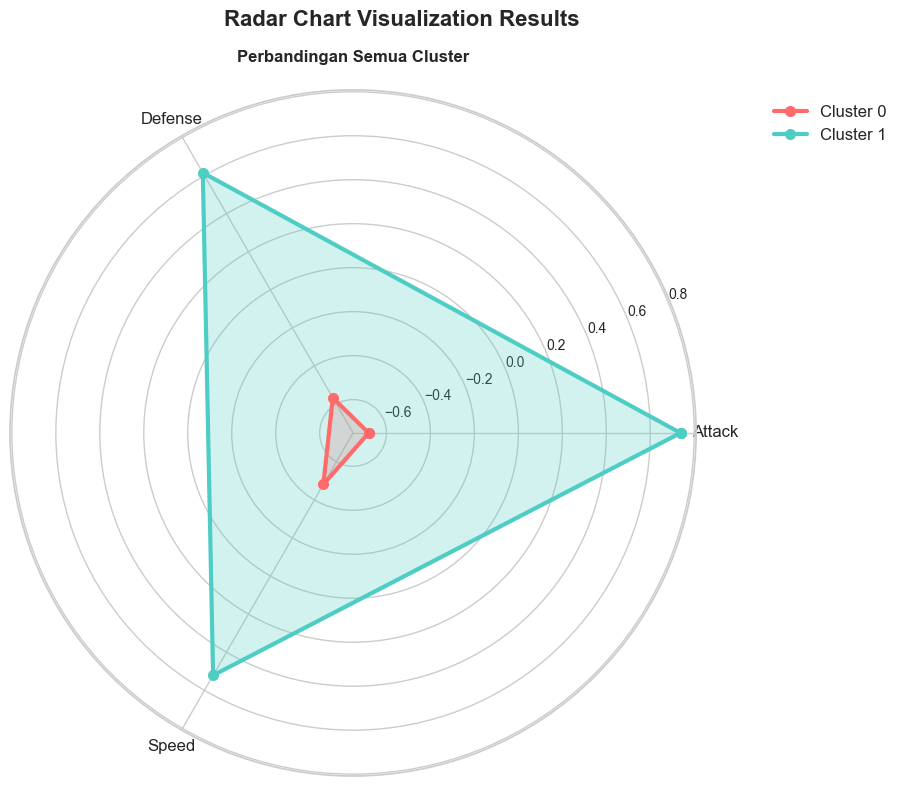

In [62]:
from math import pi

# referensi : claude
# Fungsi untuk membuat radar chart
def create_radar_chart(df_with_clusters, features=['Attack', 'Defense', 'Speed']):
    """
    Membuat radar chart untuk visualisasi cluster centroid
    """
    # Hitung centroid untuk setiap cluster
    cluster_centroids = df_with_clusters.groupby('cluster')[features].mean()
    
    # Setup figure - hanya satu chart
    fig, ax = plt.subplots(figsize=(10, 8), subplot_kw=dict(projection='polar'))
    fig.suptitle('Radar Chart Visualization Results', fontsize=16, fontweight='bold')
    
    # Warna untuk setiap cluster
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7']
    
    # Sudut untuk setiap fitur
    angles = [n / float(len(features)) * 2 * pi for n in range(len(features))]
    angles += angles[:1]  # Kembali ke titik awal
    
    # Plot: Semua cluster dalam satu chart
    ax.set_title('Perbandingan Semua Cluster', pad=20, fontweight='bold')
    
    for cluster_id in cluster_centroids.index:
        values = cluster_centroids.loc[cluster_id].values.tolist()
        values += values[:1]  # Kembali ke titik awal
        
        ax.plot(angles, values, 'o-', linewidth=3, 
                label=f'Cluster {cluster_id}', color=colors[cluster_id], markersize=8)
        ax.fill(angles, values, alpha=0.25, color=colors[cluster_id])
    
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(features, fontsize=12)
    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0), fontsize=12)
    ax.grid(True)
    
    plt.tight_layout()
    return fig


fig1 = create_radar_chart(df_with_clusters)
plt.show()
    

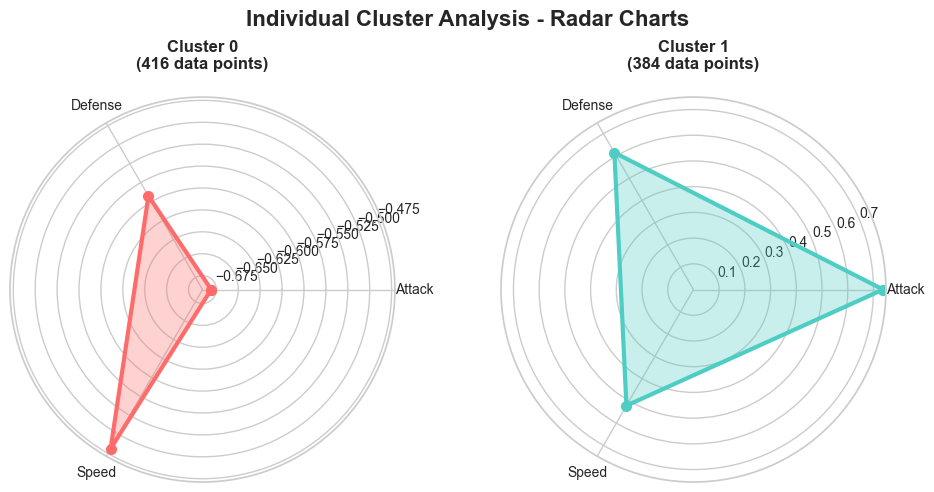

In [50]:
def create_individual_radar_charts(df_with_clusters, features=['Attack', 'Defense', 'Speed']):
    """
    Membuat radar chart terpisah untuk setiap cluster
    """
    cluster_centroids = df_with_clusters.groupby('cluster')[features].mean()
    n_clusters = len(cluster_centroids)
    
    # Setup figure dengan subplot untuk setiap cluster
    cols = min(3, n_clusters)
    rows = (n_clusters + cols - 1) // cols
    
    fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 5*rows), 
                            subplot_kw=dict(projection='polar'))
    fig.suptitle('Individual Cluster Analysis - Radar Charts', fontsize=16, fontweight='bold')
    
    if n_clusters == 1:
        axes = [axes]
    elif rows == 1:
        axes = axes if isinstance(axes, (list, np.ndarray)) else [axes]
    else:
        axes = axes.flatten()
    
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7']
    angles = [n / float(len(features)) * 2 * pi for n in range(len(features))]
    angles += angles[:1]
    
    for i, cluster_id in enumerate(cluster_centroids.index):
        ax = axes[i]
        values = cluster_centroids.loc[cluster_id].values.tolist()
        values += values[:1]
        
        ax.plot(angles, values, 'o-', linewidth=3, 
               color=colors[cluster_id], markersize=8)
        ax.fill(angles, values, alpha=0.3, color=colors[cluster_id])
        
        ax.set_title(f'Cluster {cluster_id}\n({len(df_with_clusters[df_with_clusters.cluster == cluster_id])} data points)', 
                    pad=20, fontweight='bold')
        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(features, fontsize=10)
        ax.grid(True)
    
    # Sembunyikan subplot yang tidak digunakan
    for i in range(n_clusters, len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    return fig

fig2 = create_individual_radar_charts(df_with_clusters)
plt.show()

Cluster 0 merepresentasikan kelompok pokemon dengan profil lemah secara keseluruhan. Pokemon dalam cluster ini memiliki kemampuan di bawah rata-rata untuk semua aspek pertempuran, menjadikan mereka kurang efektif dalam situasi kompetitif. Kemungkinan besar kelompok ini diisi oleh pokemon peran pendukung, pokemon evolusi rendah, pokemon starter. Ini cocok untuk trainer pemula dan pokemon ini memiliki potensi yang lebih tinggi untuk dikembangkan. ( contoh yaitu bulbasaur)


Cluster 1 mencakup pokemon dengan profil kuat yang unggul di semua aspek pertempuran. Kelompok ini terdiri dari pokemon dengan kemampuan di atas rata-rata yang dapat diandalkan dalam  situasi pertempuran. Meskipun distribusi antara kedua cluster cukup seimbang, perbedaan kualitas yang jelas membuat Cluster 1 menjadi pilihan utama untuk strategi kompetitif.

## Hierarchical Clustering

### Soal 1

Latih model AgglomerativeClustering dengan fitur yang sudah kalian pilih

In [51]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(df_selected)

### Soal 2

Visualisasikan dendogram dari model Agglomerativenya. Berikan interpretasinya dan tentukan juga jumlah cluster yang optimal dari visualisasi yang didapat.

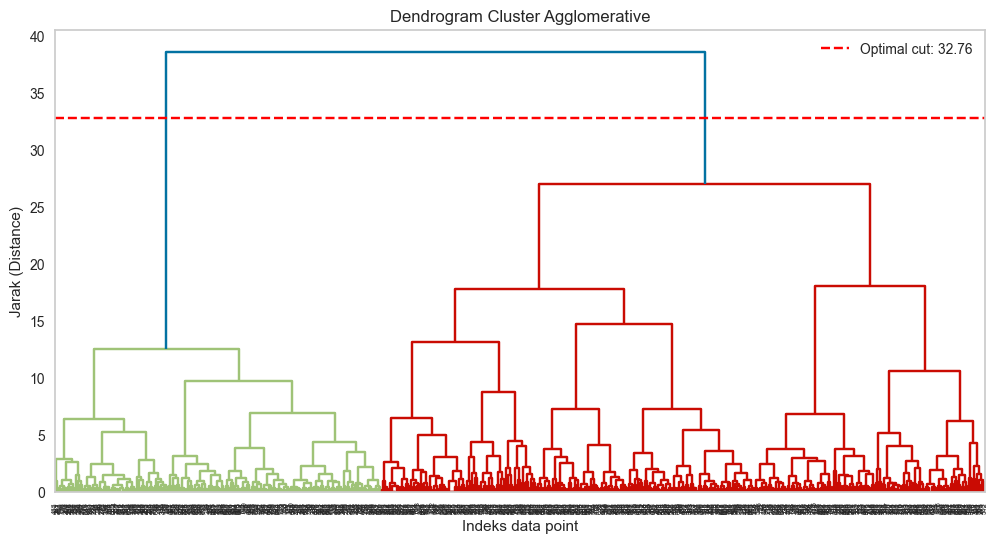

In [52]:

# Plot dendrogram
plt.figure(figsize=(12, 6))
plt.grid(False)
linkage_matrix = plot_dendrogram(model, truncate_mode=None)
plt.title("Dendrogram Cluster Agglomerative")
plt.xlabel("Indeks data point")
plt.ylabel("Jarak (Distance)")

# Temukan optimal cut
distances = linkage_matrix[:, 2]
gaps = np.diff(distances)
max_gap_idx = np.argmax(gaps)
optimal_cut = (distances[max_gap_idx] + distances[max_gap_idx + 1]) / 2

plt.axhline(y=optimal_cut, color='red', linestyle='dashed', label=f'Optimal cut: {optimal_cut:.2f}')
plt.legend()
plt.show()


Dari hasil dendogram diatas, terlihat garis putus2 merah memotong 2 garis vertikal sehingga jumlah cluster optimalnya adalah2 

### Soal 3

Latih model AgglomerativeClustering dengan jumlah cluster yang sudah ditentukan sebelumnya

In [53]:
# Pilih n_clusters berdasarkan dendrogram
agglomerative = AgglomerativeClustering(n_clusters=2)
cluster_assignment = agglomerative.fit_predict(df_selected)

### Soal 4

Visualisasikan hasil clustering AgglomerativeClustering-nya dan bandingkan hasilnya dengan hasil dari kMeans Clustering.

In [54]:
df_selected['agglo_cluster'] = cluster_assignment  # dari AgglomerativeClustering
df_selected['kmeans_cluster'] = df_with_clusters['cluster'].values


/var/folders/vs/zksk8xgx1vxczt_hfgx08gzc0000gn/T/ipykernel_45800/4055479693.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['agglo_cluster'] = cluster_assignment  # dari AgglomerativeClustering
/var/folders/vs/zksk8xgx1vxczt_hfgx08gzc0000gn/T/ipykernel_45800/4055479693.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['kmeans_cluster'] = df_with_clusters['cluster'].values


In [55]:
df_selected

,Attack,Defense,Speed,agglo_cluster,kmeans_cluster
0,-0.930560,-0.836334,-0.803394,1,0
1,-0.525944,-0.352554,-0.284992,1,0
2,0.096544,0.338559,0.406211,0,1
3,0.656783,1.720787,0.406211,0,1
4,-0.837187,-1.043668,-0.112191,1,0
...,...,...,...,...,...
795,0.656783,2.653790,-0.630593,0,1
796,2.524245,1.271563,1.443016,0,1
797,0.968026,-0.456221,0.060610,0,1
798,2.524245,-0.456221,0.406211,0,1


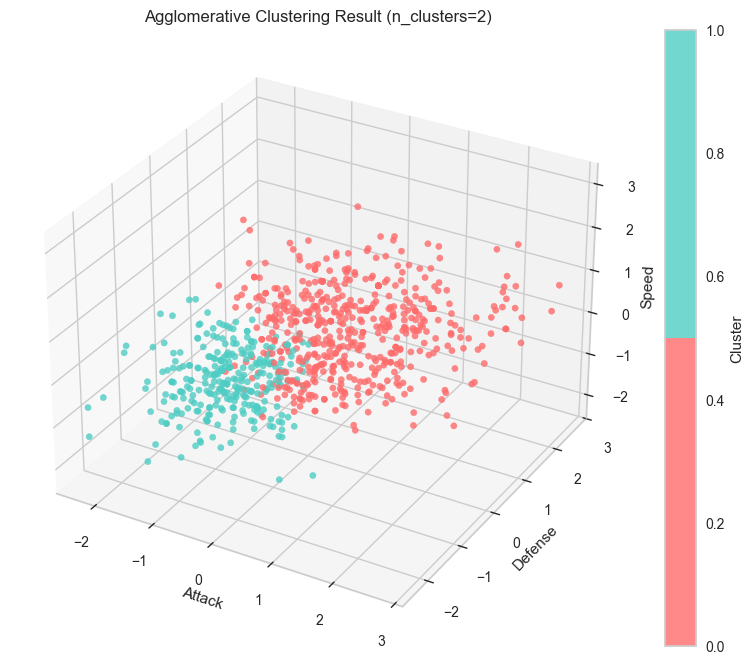

In [56]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

# Warna khusus untuk masing-masing cluster
custom_colors = ['#FF6B6B', '#4ECDC4']  # Cluster 0, 1, 2
cmap = ListedColormap(custom_colors)

# Visualisasi 3D hasil AgglomerativeClustering
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection="3d")

x = df_selected["Attack"]
y = df_selected["Defense"]
z = df_selected["Speed"]
cluster = df_selected['agglo_cluster']

sc = ax.scatter(x, y, z, c=cluster, cmap=cmap, alpha=0.8)

plt.title("Agglomerative Clustering Result (n_clusters=2)")
ax.set_xlabel("Attack")
ax.set_ylabel("Defense")
ax.set_zlabel("Speed")
plt.colorbar(sc, label='Cluster')
plt.show()


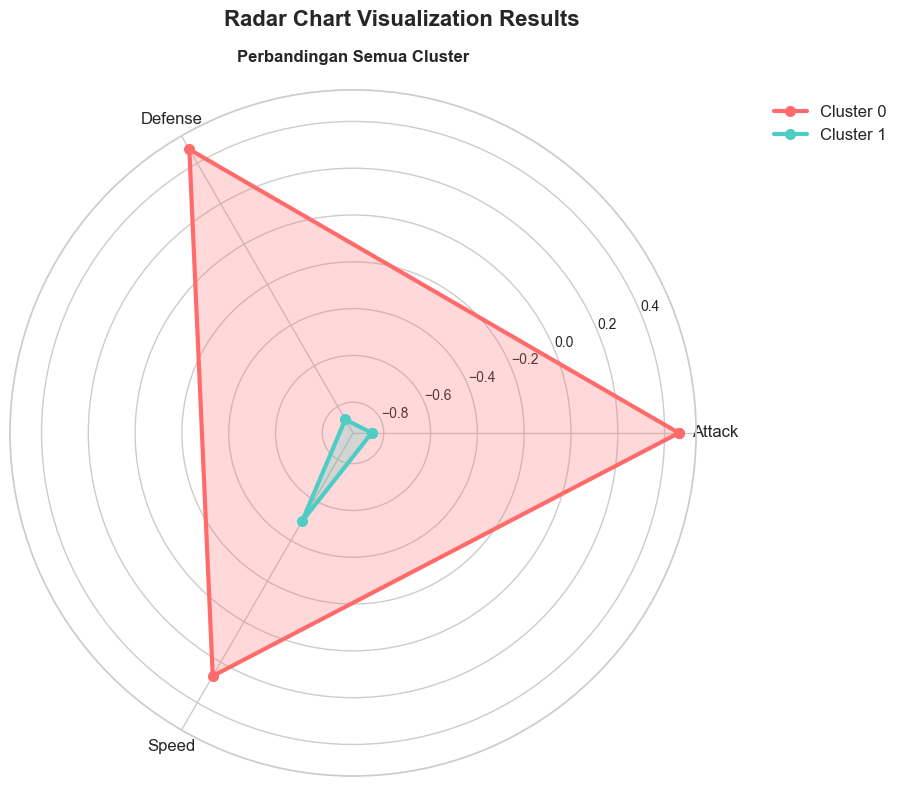

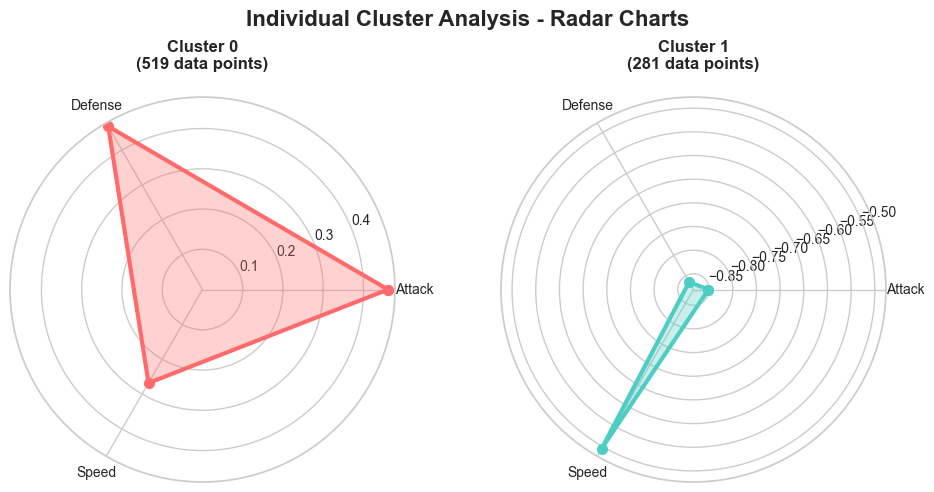

In [63]:
df_for_radar = df_selected.copy()
df_for_radar.rename(columns={'agglo_cluster': 'cluster'}, inplace=True)

fig1 = create_radar_chart(df_for_radar)
plt.show()

fig2 = create_individual_radar_charts(df_for_radar)
plt.show()


Berdasarkan hasil Agglomerative Clustering, terlihat pola pembagian yang serupa dengan KMeans, meskipun pendekatannya berbeda. Cluster 0 dari Agglomerative berisi kelompok Pokémon dengan performa lebih tinggi secara umum, ditandai dengan nilai rata-rata yang lebih tinggi pada semua fitur seperti Attack, Defense, dan Speed. Sebaliknya, Cluster 1 cenderung mencakup Pokémon dengan atribut yang lebih rendah di ketiga fitur tersebut. Artinya, metode ini juga berhasil memisahkan Pokémon ke dalam dua kelompok besar: yang unggul dan yang kurang unggul secara statistik dalam pertempuran.


Menariknya, jika dilihat dari fitur Speed, baik pada hasil Agglomerative maupun KMeans, terlihat pola yang agak berbeda dibanding Attack dan Defense. Pada cluster yang dianggap lemah, Speed justru cenderung sedikit lebih tinggi relatif terhadap dua fitur lainnya, fenomena ini paling jelas terlihat pada hasil Agglomerative. Sementara itu, Pokémon di cluster kuat memang unggul di semua aspek, namun peningkatan Speed-nya tidak sebesar peningkatan Attack dan Defense, seolah ada trade-off antara kekuatan dan kecepatan. Hal ini mengindikasikan bahwa Speed mungkin bukan indikator utama dari kekuatan tempur secara keseluruhan, dan Pokémon dengan atribut menyerang atau bertahan yang rendah bisa jadi cenderung memiliki kecepatan yang lebih tinggi dibanding stat lain. Insight ini membuka kemungkinan bahwa beberapa Pokémon lemah secara fisik tetap dapat berperan dalam pertempuran lewat keunggulan turn atau strategi berbasis kecepatan.

# Soal Teoritis

### Soal 1

Jika kita menggunakan KMeans berulang kali, apakah hasil clusteringnya akan sama?

Tidak selalu. KMeans sering kali menghasilkan hasil yang berbeda pada setiap run, terutama jika initialisasi centroid dilakukan secara acak. Karena KMeans sangat bergantung pada titik awal (initial centroids), dua eksekusi dengan random seed berbeda bisa menghasilkan pembagian cluster yang berbeda, terutama pada data yang kompleks atau tidak jelas pemisahannya. Untuk hasil yang lebih stabil, biasanya digunakan KMeans++ initialization dan/atau ditetapkan nilai random_state untuk membuat hasilnya reproducible.

### Soal 2

Diketahui pada Agglomerative Clustering terdapat beberapa Proximity Measures, yaitu Single, Complete, dan Average Link. Jelaskan Pros n cons dari ketiga Proximity Measures tersebut.

a. Single Linkage (Minimum Distance)
Kelebihan:
- Dapat menangkap bentuk cluster yang memanjang atau tidak beraturan (misalnya bentuk rantai).
- Sensitif terhadap outlier, sehingga bisa menghubungkan titik jauh secara cepat.

Kekurangan:
- Rentan terhadap fenomena chaining effect, di mana cluster terbentuk dari rangkaian titik-titik yang berdekatan, meskipun secara keseluruhan tidak kohesif.

b. Complete Linkage (Maximum Distance)
Kelebihan:
- Menghasilkan cluster yang lebih kompak dan bulat (tight).
- Lebih tahan terhadap chaining effect dibanding single linkage.

Kekurangan:
- Lebih sensitif terhadap outlier atau titik ekstrem, karena jarak terjauh akan menentukan penggabungan.

c. Average Linkage (Mean Distance)
Kelebihan:
- Menawarkan kompromi antara single dan complete linkage.
- Menghasilkan cluster yang cukup stabil dan tidak terlalu terpengaruh oleh satu titik ekstrem.

Kekurangan:
- Bisa jadi kurang akurat jika data memiliki struktur cluster yang sangat tidak beraturan atau berbeda ukuran/densitas.



### Soal 3

Algoritma KMeans tidak cocok untuk data yang tidak bersifat hyper-ellipsoid. Mengapa?

KMeans bekerja dengan asumsi bahwa setiap cluster memiliki bentuk bulat atau ellipsoid (hiperbola berdimensi tinggi), dengan variansi yang seragam di semua arah. Algoritma ini meminimalkan jarak Euclidean ke centroid, sehingga cocok untuk cluster yang berbentuk bulat dan seimbang.

Namun, jika data memiliki bentuk cluster yang memanjang, tidak beraturan, melengkung, atau berdensitas berbeda, KMeans akan gagal mengenali struktur tersebut karena hanya mempertimbangkan jarak langsung ke pusat cluster, bukan distribusi keseluruhan. Akibatnya, KMeans bisa salah mengelompokkan data atau membelah cluster alami menjadi beberapa bagian. Untuk data semacam ini, metode seperti DBSCAN atau Agglomerative Clustering dengan single/average linkage biasanya lebih sesuai.

# Soal Hitungan KMeans

Di bagian ini kalian diminta untuk melakukan clustering dengan KMeans from scratch secara bertahap menggunakan dataset yang berisi kumpulan data point (x,y). Kalian bisa langsung ketik jawabannya dengan markdown. Kalian dibolehkan menggunakan code python untuk menghitung, tetapi tidak boleh langsung memakai KMeans bawaan. Berikut ketentuan lainnya:
- Gunakan **Manhattan distance**
- Gunakan **jumlah cluster = 2 (k=2)**
- Tahap penting yang harus kalian lakukan adalah **Inisialisasi Centroid**, **Perhitungan Jarak ke Centroid**, **Assign cluster**, **Update Centroid**, dan **Cek Stopping Criteria (Khusus iterasi 2 dan seterusnya)**.

In [74]:
data = pd.read_csv("kmeans.csv")
data.head()

,x,y
0,10.0,5.0
1,10.0,8.5
2,1.0,5.0
3,9.0,10.5
4,3.5,8.0


In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       14 non-null     float64
 1   y       14 non-null     float64
dtypes: float64(2)
memory usage: 352.0 bytes


In [76]:
def manhattan_distance(a, b):
    return np.abs(a - b).sum()

## Bagian 1

### Iterasi x

Kalian boleh memakai cell Iterasi x ini sebagai panduan pengisian jawaban

#### Inisialisasi Centroid

In [70]:
# Konversi ke NumPy array untuk efisiensi
X = data[['x', 'y']].values

# Tahap 1: Inisialisasi centroid (ambil dua titik awal, bisa manual atau random)
# Misalnya, saya pilih indeks 0 dan 2
centroids = np.array([
    X[0],  # centroid 0
    X[2]   # centroid 1
])
centroids

array([[10.,  5.],
       [ 1.,  5.]])

Centroid awal diambil dari data point index ke-0 dan ke-2:
- C0 = (10.0, 5.0)
- C1 = (1.0, 5.0)

#### Perhitungan jarak ke Centroid

In [78]:
distances = []
for point in X:
    d0 = manhattan_distance(point, centroids[0])
    d1 = manhattan_distance(point, centroids[1])
    distances.append([d0, d1])
distances = np.array(distances)
distances

array([[ 0. ,  9. ],
       [ 3.5, 12.5],
       [ 9. ,  0. ],
       [ 6.5, 13.5],
       [ 9.5,  5.5],
       [ 2. ,  7. ],
       [ 8. ,  3. ],
       [12.5,  4.5],
       [ 7. , 16. ],
       [14.5,  8.5],
       [ 3.5,  9.5],
       [ 5. , 10. ],
       [10. ,  4. ],
       [ 5.5,  3.5]])

Setiap titik dihitung jaraknya ke dua centroid menggunakan Manhattan distance.

#### Assign Cluster

In [79]:
clusters = np.argmin(distances, axis=1)

Setiap titik di-assign ke cluster dengan jarak terdekat.

#### Update Centroid

In [80]:
new_centroids = np.array([X[clusters == k].mean(axis=0) for k in range(2)])
new_centroids

array([[9.14285714, 7.35714286],
       [2.64285714, 7.21428571]])

Centroid baru dihitung sebagai rata-rata posisi semua titik dalam masing-masing cluster.

In [81]:
# Output
print("Centroid Awal:\n", centroids)
print("Jarak ke centroid:\n", distances)
print("Cluster Assignment:\n", clusters)
print("Centroid Baru:\n", new_centroids)

Centroid Awal:
 [[10.  5.]
 [ 1.  5.]]
Jarak ke centroid:
 [[ 0.   9. ]
 [ 3.5 12.5]
 [ 9.   0. ]
 [ 6.5 13.5]
 [ 9.5  5.5]
 [ 2.   7. ]
 [ 8.   3. ]
 [12.5  4.5]
 [ 7.  16. ]
 [14.5  8.5]
 [ 3.5  9.5]
 [ 5.  10. ]
 [10.   4. ]
 [ 5.5  3.5]]
Cluster Assignment:
 [0 0 1 0 1 0 1 1 0 1 0 0 1 1]
Centroid Baru:
 [[9.14285714 7.35714286]
 [2.64285714 7.21428571]]


#### Cek Stopping Criteria (khusus iterasi 2 dst.)

Jika sudah terpenuhi, stop algoritma

In [84]:
tol = 1e-4  # toleransi perbedaan centroid untuk berhenti
max_iter = 100  # batas maksimal iterasi

centroids = new_centroids  # gunakan centroid hasil update sebagai awal iterasi berikutnya

for i in range(max_iter):
    distances = []
    for point in X:
        d0 = manhattan_distance(point, centroids[0])
        d1 = manhattan_distance(point, centroids[1])
        distances.append([d0, d1])
    distances = np.array(distances)
    
    clusters = np.argmin(distances, axis=1)
    new_centroids = np.array([X[clusters == k].mean(axis=0) for k in range(2)])
    
    print(f"Iterasi {i+2}")  # karena iterasi 1 sudah dilakukan
    print("Centroid lama:\n", centroids)
    print("Cluster Assignment:\n", clusters)
    print("Centroid baru:\n", new_centroids)
    print("-" * 30)
    
    # Cek stopping criteria (jika perubahan centroid sangat kecil)
    diffs = np.abs(new_centroids - centroids)
    if np.all(diffs <= tol):
        print(f"Algoritma konvergen pada iterasi ke-{i+2}")
        break
    
    centroids = new_centroids
else:
    print("Maksimal iterasi tercapai tanpa konvergensi.")


Iterasi 2
Centroid lama:
 [[9.14285714 7.35714286]
 [2.64285714 7.21428571]]
Cluster Assignment:
 [0 0 1 0 1 0 1 1 0 1 0 0 1 1]
Centroid baru:
 [[9.14285714 7.35714286]
 [2.64285714 7.21428571]]
------------------------------
Algoritma konvergen pada iterasi ke-2


Iterasi berhenti ketika centroid tidak berubah secara signifikan (konvergen).

## Bagian 2

Ulangi prosedur KMeans yang kalian lakukan di bagian 1, tetapi gunakan **kombinasi centroid awal yang berbeda** (bebas memilih centroid awal, selain yang terdapat di Bagian 1)

### Iterasi x

Kalian boleh memakai cell Iterasi x ini sebagai panduan pengisian jawaban

#### Inisialisasi Centroid

In [85]:
# Konversi ke NumPy array untuk efisiensi
X = data[['x', 'y']].values

# Tahap 1: Inisialisasi centroid (ambil dua titik awal, bisa manual atau random)
# Misalnya, saya pilih indeks 0 dan 2
centroids = np.array([
    X[1],  # centroid 0
    X[4]   # centroid 1
])
centroids

array([[10. ,  8.5],
       [ 3.5,  8. ]])

#### Perhitungan jarak ke Centroid

In [86]:
distances = []
for point in X:
    d0 = manhattan_distance(point, centroids[0])
    d1 = manhattan_distance(point, centroids[1])
    distances.append([d0, d1])
distances = np.array(distances)
distances

array([[ 3.5,  9.5],
       [ 0. ,  7. ],
       [12.5,  5.5],
       [ 3. ,  8. ],
       [ 7. ,  0. ],
       [ 5.5,  7.5],
       [11.5,  4.5],
       [ 9. ,  3. ],
       [ 3.5, 10.5],
       [11. ,  5. ],
       [ 7. , 10. ],
       [ 2.5,  4.5],
       [ 8.5,  1.5],
       [ 9. ,  4. ]])

#### Assign Cluster

In [87]:
clusters = np.argmin(distances, axis=1)

#### Update Centroid

In [88]:
new_centroids = np.array([X[clusters == k].mean(axis=0) for k in range(2)])
new_centroids

array([[9.14285714, 7.35714286],
       [2.64285714, 7.21428571]])

In [89]:
# Output
print("Centroid Awal:\n", centroids)
print("Jarak ke centroid:\n", distances)
print("Cluster Assignment:\n", clusters)
print("Centroid Baru:\n", new_centroids)

Centroid Awal:
 [[10.   8.5]
 [ 3.5  8. ]]
Jarak ke centroid:
 [[ 3.5  9.5]
 [ 0.   7. ]
 [12.5  5.5]
 [ 3.   8. ]
 [ 7.   0. ]
 [ 5.5  7.5]
 [11.5  4.5]
 [ 9.   3. ]
 [ 3.5 10.5]
 [11.   5. ]
 [ 7.  10. ]
 [ 2.5  4.5]
 [ 8.5  1.5]
 [ 9.   4. ]]
Cluster Assignment:
 [0 0 1 0 1 0 1 1 0 1 0 0 1 1]
Centroid Baru:
 [[9.14285714 7.35714286]
 [2.64285714 7.21428571]]


#### Cek Stopping Criteria (khusus iterasi 2 dst.)

Jika sudah terpenuhi, stop algoritma

In [90]:
tol = 1e-4  # toleransi perbedaan centroid untuk berhenti
max_iter = 100  # batas maksimal iterasi

centroids = new_centroids  # gunakan centroid hasil update sebagai awal iterasi berikutnya

for i in range(max_iter):
    distances = []
    for point in X:
        d0 = manhattan_distance(point, centroids[0])
        d1 = manhattan_distance(point, centroids[1])
        distances.append([d0, d1])
    distances = np.array(distances)
    
    clusters = np.argmin(distances, axis=1)
    new_centroids = np.array([X[clusters == k].mean(axis=0) for k in range(2)])
    
    print(f"Iterasi {i+2}")  # karena iterasi 1 sudah dilakukan
    print("Centroid lama:\n", centroids)
    print("Cluster Assignment:\n", clusters)
    print("Centroid baru:\n", new_centroids)
    print("-" * 30)
    
    # Cek stopping criteria (jika perubahan centroid sangat kecil)
    diffs = np.abs(new_centroids - centroids)
    if np.all(diffs <= tol):
        print(f"Algoritma konvergen pada iterasi ke-{i+2}")
        break
    
    centroids = new_centroids
else:
    print("Maksimal iterasi tercapai tanpa konvergensi.")


Iterasi 2
Centroid lama:
 [[9.14285714 7.35714286]
 [2.64285714 7.21428571]]
Cluster Assignment:
 [0 0 1 0 1 0 1 1 0 1 0 0 1 1]
Centroid baru:
 [[9.14285714 7.35714286]
 [2.64285714 7.21428571]]
------------------------------
Algoritma konvergen pada iterasi ke-2


## Bagian 3

Berdasarkan bagian 1 dan 2, Ceritakan observasi yang kalian amati. Apakah hasil clusteringnya berbeda? Mengapa bisa sama/berbeda?

Berdasarkan hasil kedua eksperimen K-means clustering, terlihat bahwa meskipun centroid awal yang dipilih berbeda antara bagian 1 dan bagian 2, kedua algoritma menghasilkan hasil clustering yang identik. Pada bagian 1, centroid awal adalah [[10, 5], [1, 5]], sedangkan pada bagian 2 adalah [[10, 8.5], [3.5, 8]]. Namun, setelah iterasi pertama, kedua eksperimen menghasilkan centroid yang sama persis yaitu [[9.14285714, 7.35714286], [2.64285714, 7.21428571]] dan cluster assignment yang identik [0 0 1 0 1 0 1 1 0 1 0 0 1 1].

Kesamaan hasil ini menunjukkan bahwa dataset yang digunakan memiliki struktur clustering yang cukup jelas dan stabil, sehingga meskipun dimulai dari titik inisialisasi yang berbeda, algoritma K-means tetap konvergen ke solusi optimal yang sama. Hal ini mengindikasikan bahwa terdapat dua cluster yang terpisah dengan baik dalam data, dan perbedaan posisi centroid awal tidak cukup signifikan untuk mengubah pengelompokan akhir. Fenomena ini menunjukkan robustness dari hasil clustering pada dataset tertentu, meskipun secara umum K-means dapat menghasilkan hasil yang berbeda tergantung pada inisialisasi centroid awal, terutama pada dataset dengan struktur yang lebih kompleks atau ambigu.Coba lagiClaude dapat membuat kesalahan. Periksa kembali setiap respons.